## daywise data tranform for flood

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

db_time=pd.read_csv('em_dat_flood_dates_v1.csv')

db_time['Start Year']=db_time["Start Year"].astype(str)
#dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].astype(str)
db_time['Start Month']=db_time["Start Month"].apply(lambda x: str(int(x)).zfill(2))
db_time['End Year']=db_time["End Year"].astype(str)
#dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].astype(str)
db_time['End Month']=db_time["End Month"].apply(lambda x: str(int(x)).zfill(2))


def create_daterange_list(row):
    start_date_str=row['Start Year']+'-'+row['Start Month']+'-'+str(int(row['Start Day']))
    end_date_str=row['End Year']+'-'+row['End Month']+'-'+str(int(row['End Day']))
    date_str_list=pd.date_range(start_date_str,end_date_str, freq='D').strftime("%Y-%m-%d").tolist()
    return date_str_list


date_str_list_cont=[]
for idx,row in db_time.iterrows():
    #dfb_dr_ea_time.at[idx,'date_str_list'] = create_daterange_list(row)
    #print(idx)
    #print(row)
    date_str_list=create_daterange_list(row)
    date_str_list_cont.append(date_str_list)
    
db_time['date_str_list']=date_str_list_cont
db_time1=db_time[['Dis No','date_str_list']]
# #dfb_dr_ea_time

df_fl=db_time1.explode('date_str_list')

df_t=df_fl.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

dft1=df_t.reset_index()
dft1['date']=dft1['date_str_list'].apply(pd.to_datetime)
dft1['year']=dft1['date'].dt.year
dft1['days']=dft1['date'].dt.dayofyear
# df=dft1.groupby('year').agg({'Dis No': 'sum'})
# df['disno1'] = df['Dis No'].apply(lambda x: list(set(x)))
# df_year=df.reset_index()
# df_year1=df_year[['year','disno1']]

dft1


def gen_list_days(im_df,year):
    n_days = 366 if calendar.isleap(year) else 365
    df = pd.DataFrame({"year": year,
                   "days": range(1, n_days + 1)})
    dfta=dft1[dft1['year']==year]
    dfta['event']=1
    dftb=dfta[['Dis No','date','days','event']]
    dftc=pd.merge(df,dftb,on='days',how='left')
    dftd=dftc.fillna(0)
    event_list=dftd['event'].tolist()
    event_list.insert(0,str(year))
    return event_list


year_list=np.arange(1990,2023,1)


el_cont=[]
for yearl in year_list:
    el=gen_list_days(dft1,yearl)
    el_cont.append(el)
    
db=pd.DataFrame(el_cont)
db1=db.set_index(0)
db2=db1.fillna(0)
cols = db2.columns
db2[cols] = db2[cols].applymap(np.int64)
db2.to_csv('/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/ea-ibf-climada/impact_catalog/cal_data_flood.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'em_dat_flood_dates_v1.csv'

## daywise data for drought

In [65]:
import pandas as pd
from datetime import datetime
import numpy as np

em_data_filepath='emdat_public_2022_08_11_query_uid-IKGfZc.xlsx'

dfb = pd.read_excel(em_data_filepath, engine='openpyxl',skiprows=6,sheet_name = 'emdat data')

dfb_dr=dfb[dfb['Disaster Type']=='Drought']

ea_cntr=['Djibouti', 'Eritrea','Ethiopia','Kenya','Rwanda', 'Somalia','South Sudan','Sudan (the)','Tanzania, United Republic of']

#dfb1_ea=dfb1[dfb1['Country'].str.contains(ea_cntr)]
dfb_dr_ea=dfb_dr[dfb_dr['Country'].isin(ea_cntr)]
#dfb_dr_ea.info()

dfb_dr_ea_time=dfb_dr_ea[['Dis No','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day']]
#dfb_dr_ea_time['Start Month'].tolist()
dfb_dr_ea_time['Start Month']=dfb_dr_ea_time['Start Month'].fillna(1.0)
dfb_dr_ea_time['Start Day']=dfb_dr_ea_time['Start Day'].fillna(1.0)

dfb_dr_ea_time['End Month']=dfb_dr_ea_time['End Month'].fillna(12.0)

def last_day_month(row):
    firstday_month = datetime(int(row['End Year']), int(row['End Month']), 1)
    lastday_month = firstday_month + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    lastday_month_str =lastday_month.strftime("%d")
    return lastday_month_str

 
for idx,row in dfb_dr_ea_time.iterrows():
    dfb_dr_ea_time.loc[idx,'End Day'] = last_day_month(row)    
    #dfb_dr_ea_time.loc[idx,'end_day'] = last_day_month(row)    

    
#dfb_dr_ea_time['End Day']=dfb_dr_ea_time['Start Day'].fillna(28.0)


dfb_dr_ea_time['Start Year']=dfb_dr_ea_time["Start Year"].astype(str)
#dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].astype(str)
dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].apply(lambda x: str(int(x)).zfill(2))
dfb_dr_ea_time['End Year']=dfb_dr_ea_time["End Year"].astype(str)
#dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].astype(str)
dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].apply(lambda x: str(int(x)).zfill(2))

#pd.date_range('2014-10-10','2016-01-07', freq='MS').strftime("%Y-%m").tolist()

def create_daterange_list(row):
    start_date_str=row['Start Year']+'-'+row['Start Month']+'-'+str(int(row['Start Day']))
    end_date_str=row['End Year']+'-'+row['End Month']+'-'+row['End Day']
    date_str_list=pd.date_range(start_date_str,end_date_str, freq='D').strftime("%Y-%m-%d").tolist()
    return date_str_list


date_str_list_cont=[]
for idx,row in dfb_dr_ea_time.iterrows():
    #dfb_dr_ea_time.at[idx,'date_str_list'] = create_daterange_list(row)
    #print(idx)
    #print(row)
    date_str_list=create_daterange_list(row)
    date_str_list_cont.append(date_str_list)
    
#dfb_dr_ea_time

#df_dr=dfb_dr_ea_time.explode('date_str_list')

#df_dr1=df_dr.drop_duplicates('date_str_list')
dfb_dr_ea_time['date_str_list']=date_str_list_cont
df_dr=dfb_dr_ea_time.explode('date_str_list')
#df_dr1=df_dr.drop_duplicates('date_str_list')

df_t=df_dr.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

dft1=df_t.reset_index()
dft1['date']=dft1['date_str_list'].apply(pd.to_datetime)
dft1['year']=dft1['date'].dt.year
dft1['days']=dft1['date'].dt.dayofyear
# df=dft1.groupby('year').agg({'Dis No': 'sum'})
# df['disno1'] = df['Dis No'].apply(lambda x: list(set(x)))
# df_year=df.reset_index()
# df_year1=df_year[['year','disno1']]

dft1


def gen_list_days(im_df,year):
    n_days = 366 if calendar.isleap(year) else 365
    df = pd.DataFrame({"year": year,
                   "days": range(1, n_days + 1)})
    dfta=dft1[dft1['year']==year]
    dfta['event']=1
    dftb=dfta[['Dis No','date','days','event']]
    dftc=pd.merge(df,dftb,on='days',how='left')
    dftd=dftc.fillna(0)
    event_list=dftd['event'].tolist()
    event_list.insert(0,str(year))
    return event_list


year_list=np.arange(1990,2023,1)


el_cont=[]
for yearl in year_list:
    el=gen_list_days(dft1,yearl)
    el_cont.append(el)
    
db=pd.DataFrame(el_cont)
db1=db.set_index(0)
db2=db1.fillna(0)
cols = db2.columns
db2[cols] = db2[cols].applymap(np.int64)
db2.to_csv('/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/ea-ibf-climada/impact_catalog/cal_data_drought.csv')

In [26]:
import calendar

year = 1990

n_days = 366 if calendar.isleap(year) else 365
df = pd.DataFrame({"year": year,
                   "days": range(1, n_days + 1)})
df['date']=df.year.astype(str) + '-' + df.days.astype(str)
df['date0']=pd.to_datetime(df['date'], format='%Y-%j')
df1=df[['date0']]
df1.columns=['date']



In [27]:
dfta=dft1[dft1['year']==1990]
dfta['event']=1
dftb=dfta[['Dis No','date','event']]
# dftc=dftb.set_index('date')
# dftd = dftc.resample('D').sum().fillna(0)
# dfta

#dftc=pd.merge(dftb,df1,on='date')
#dftc

df2 = df1.sort_values('date')
dftc = dftb.sort_values('date')

df = pd.merge_asof(df2, dftc, on='date')
df

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,date,Dis No,event
0,1990-01-01,NaN,NaN
1,1990-01-02,NaN,NaN
2,1990-01-03,NaN,NaN
3,1990-01-04,NaN,NaN
4,1990-01-05,NaN,NaN
...,...,...,...
360,1990-12-27,[1990-0582-ETH],1.0
361,1990-12-28,[1990-0582-ETH],1.0
362,1990-12-29,[1990-0582-ETH],1.0
363,1990-12-30,[1990-0582-ETH],1.0


## trail 2

In [43]:
import calendar

year = 1990

n_days = 366 if calendar.isleap(year) else 365
df = pd.DataFrame({"year": year,
                   "days": range(1, n_days + 1)})


dfta=dft1[dft1['year']==1990]
dfta['event']=1
dftb=dfta[['Dis No','date','days','event']]

dftc=pd.merge(df,dftb,on='days',how='left')
dftd=dftc.fillna(0)
event_list=dftd['event'].tolist()
len(event_list)
event_list.insert(0,'1990')
len(event_list)
event_list

['1990',
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [46]:
def gen_list_days(im_df,year):
    n_days = 366 if calendar.isleap(year) else 365
    df = pd.DataFrame({"year": year,
                   "days": range(1, n_days + 1)})
    dfta=dft1[dft1['year']==year]
    dfta['event']=1
    dftb=dfta[['Dis No','date','days','event']]
    dftc=pd.merge(df,dftb,on='days',how='left')
    dftd=dftc.fillna(0)
    event_list=dftd['event'].tolist()
    event_list.insert(0,str(year))
    return event_list
    
    
im_df=pd.DataFrame()
year=2000

el=gen_list_days(im_df,year)
len(el)

367

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

em_data_filepath='emdat_public_2022_08_11_query_uid-IKGfZc.xlsx'

dfb = pd.read_excel(em_data_filepath, engine='openpyxl',skiprows=6,sheet_name = 'emdat data')

/opt/conda/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## East Africa Drought

In [2]:
dfb_dr=dfb[dfb['Disaster Type']=='Drought']

ea_cntr=['Djibouti', 'Eritrea','Ethiopia','Kenya','Rwanda', 'Somalia','South Sudan','Sudan (the)','Tanzania, United Republic of']

#dfb1_ea=dfb1[dfb1['Country'].str.contains(ea_cntr)]
dfb_dr_ea=dfb_dr[dfb_dr['Country'].isin(ea_cntr)]
dfb_dr_ea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 77 to 4601
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     62 non-null     object 
 1   Year                                       62 non-null     int64  
 2   Seq                                        62 non-null     int64  
 3   Glide                                      23 non-null     object 
 4   Disaster Group                             62 non-null     object 
 5   Disaster Subgroup                          62 non-null     object 
 6   Disaster Type                              62 non-null     object 
 7   Disaster Subtype                           62 non-null     object 
 8   Disaster Subsubtype                        0 non-null      object 
 9   Event Name                                 0 non-null      object 
 10  Country                  

In [3]:
dfb_dr_ea.to_excel("emdat_public_20220811_ea_drought.xlsx",index=False)  

In [8]:
em_data_location_filepath='em_dat_ea_drought_adm2.xlsx'

dfb = pd.read_excel(em_data_location_filepath, engine='openpyxl')

dfb['count']=dfb['geob_adm2_list'].str.len()
dfb

,Dis No,geob_adm2_list,count
0,1999-9388-ERI,"['ERI-ADM2-3_0_0-B20', 'ERI-ADM2-3_0_0-B21', '...",543
1,1999-9388-ETH,"['ETH-ADM2-3_0_0-B5', 'ETH-ADM2-3_0_0-B33', 'E...",1092
2,1999-9388-DJI,"['DJI-ADM2-3_0_0-B10', 'DJI-ADM2-3_0_0-B7', 'D...",233
3,1999-9388-SDN,"['SDN-ADM2-3_0_0-B78', 'SDN-ADM2-3_0_0-B79', '...",713
4,1999-9388-RWA,"['RWA-ADM2-3_0_0-B1', 'RWA-ADM2-3_0_0-B2', 'RW...",63
...,...,...,...
57,1996-9326-TZA,"['TZA-ADM2-3_0_0-B165', 'TZA-ADM2-3_0_0-B163',...",2351
58,1996-9089-RWA,['RWA-ADM2-3_0_0-B8'],21
59,1996-9220-SDN,"['SDN-ADM2-3_0_0-B52', 'SDN-ADM2-3_0_0-B46', '...",222
60,1998-9237-ETH,"['ETH-ADM2-3_0_0-B4', 'ETH-ADM2-3_0_0-B27', 'E...",1619


In [3]:
dfb_dr_ea_time=dfb_dr_ea[['Dis No','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day']]

dfb_dr_ea_time.info()
#pd.set_option('display.max_columns', 8)
#pd.set_option('display.max_rows', 200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 77 to 4601
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dis No       62 non-null     object 
 1   Start Year   62 non-null     int64  
 2   Start Month  49 non-null     float64
 3   Start Day    0 non-null      float64
 4   End Year     62 non-null     int64  
 5   End Month    25 non-null     float64
 6   End Day      0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [4]:


dfb_dr_ea_time=dfb_dr_ea[['Dis No','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day']]
#dfb_dr_ea_time['Start Month'].tolist()
dfb_dr_ea_time['Start Month']=dfb_dr_ea_time['Start Month'].fillna(1.0)
dfb_dr_ea_time['Start Day']=dfb_dr_ea_time['Start Day'].fillna(1.0)

dfb_dr_ea_time['End Month']=dfb_dr_ea_time['End Month'].fillna(12.0)

def last_day_month(row):
    firstday_month = datetime(int(row['End Year']), int(row['End Month']), 1)
    lastday_month = firstday_month + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    lastday_month_str =lastday_month.strftime("%d")
    return lastday_month_str

 
for idx,row in dfb_dr_ea_time.iterrows():
    dfb_dr_ea_time.loc[idx,'End Day'] = last_day_month(row)    
    #dfb_dr_ea_time.loc[idx,'end_day'] = last_day_month(row)    

    
#dfb_dr_ea_time['End Day']=dfb_dr_ea_time['Start Day'].fillna(28.0)


dfb_dr_ea_time['Start Year']=dfb_dr_ea_time["Start Year"].astype(str)
#dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].astype(str)
dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].apply(lambda x: str(int(x)).zfill(2))
dfb_dr_ea_time['End Year']=dfb_dr_ea_time["End Year"].astype(str)
#dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].astype(str)
dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].apply(lambda x: str(int(x)).zfill(2))

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
dfb_dr_ea_time

,Dis No,Start Year,Start Month,Start Day,End Year,End Month,End Day
77,1991-9224-KEN,1991,01,1.0,1992,12,31
118,1993-9573-ERI,1993,11,1.0,1993,12,31
151,1990-9289-SDN,1990,01,1.0,1990,12,31
157,1990-9604-TZA,1991,01,1.0,1992,12,31
176,1991-9686-SDN,1991,10,1.0,1992,12,31
...,...,...,...,...,...,...,...
4354,2021-9546-ETH,2021,05,1.0,2022,02,28
4355,2021-9152-KEN,2021,03,1.0,2022,03,31
4534,2021-9152-SOM,2021,03,1.0,2022,06,30
4538,2021-9639-SSD,2021,01,1.0,2021,09,30


In [6]:
#pd.date_range('2014-10-10','2016-01-07', freq='MS').strftime("%Y-%m").tolist()

def create_daterange_list(row):
    start_date_str=row['Start Year']+'-'+row['Start Month']+'-'+str(int(row['Start Day']))
    end_date_str=row['End Year']+'-'+row['End Month']+'-'+row['End Day']
    date_str_list=pd.date_range(start_date_str,end_date_str, freq='D').strftime("%Y-%m-%d").tolist()
    return date_str_list


date_str_list_cont=[]
for idx,row in dfb_dr_ea_time.iterrows():
    #dfb_dr_ea_time.at[idx,'date_str_list'] = create_daterange_list(row)
    #print(idx)
    #print(row)
    date_str_list=create_daterange_list(row)
    date_str_list_cont.append(date_str_list)
    
#dfb_dr_ea_time

#df_dr=dfb_dr_ea_time.explode('date_str_list')

#df_dr1=df_dr.drop_duplicates('date_str_list')
dfb_dr_ea_time['date_str_list']=date_str_list_cont
df_dr=dfb_dr_ea_time.explode('date_str_list')
#df_dr1=df_dr.drop_duplicates('date_str_list')

df_t=df_dr.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10380 entries, 1990-01-01 to 2022-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Dis No  10380 non-null  object
dtypes: object(1)
memory usage: 162.2+ KB


In [9]:
aa=pd.date_range('1990-01-01','2022-06-30', freq='D').strftime("%Y-%m").tolist()
len(aa)

11869

In [11]:
df_t.to_csv('/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/ea_climada/ea-ibf-climada/impact_catalog/test2.csv')

In [8]:
df_dr1['dr']=1
#df_dr1=df_dr.drop_duplicates('date_str_list')
df_dr1['date']=df_dr1['date_str_list'].apply(pd.to_datetime)
df_dr1['doy']=df_dr1['date'].dt.dayofyear
df_dr1['year']=df_dr1['date'].dt.year
df_dr2=df_dr1[['year','doy','dr']]
df=pd.pivot_table(df_dr2, values='dr', index=['year'],columns=['doy'])
df1=df.rename_axis(None)

df2=df1.fillna(2)

cols=df2.columns
df2[cols] = df2[cols].applymap(np.int64)
df3=df2.iloc[:, 0:60]
df4=df3.reset_index()

NameError: name 'df_dr1' is not defined

In [60]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import six
from datetime import datetime


### functions for whole column, row editing
def set_align_for_column(table, col, align="left"):
    cells = [key for key in table._cells if key[1] == col]
    for cell in cells:
        table._cells[cell]._loc = align


def set_width_for_column(table, col, width):
    cells = [key for key in table._cells if key[1] == col]
    for cell in cells:
        table._cells[cell]._width = width
        
def set_height_for_row(table, row, height):
    cells = [key for key in table._cells if key[0] == row]
    for cell in cells:
        table._cells[cell]._height = height

def colorcell(tablerows,tablecols,cellDict):
    allcells=[(x,y) for x in tablerows[1:] for y in tablecols[1:]]
    for alcls in allcells:
        if int(cellDict[alcls]._text.get_text()) ==0:
            cellDict[alcls].set_facecolor('#FFFFFF')
        elif int(cellDict[alcls]._text.get_text()) == 1:
            cellDict[alcls].set_facecolor('#FF0000')
        else:
            cellDict[alcls].set_facecolor('#961414')

def removeaqivalue(tablerows,tablecols,mpl_table):
    allcells=[(x,y) for x in tablerows[1:] for y in tablecols[1:]]
    for alcls in allcells:
        mpl_table._cells[alcls]._text.set_text('')

def set_height_for_row_except_head(table, rowlist, height):
    cells_list=[]
    for row in rowlist:
        cells = [key for key in table._cells if key[0] == row]
        cells_list.append(cells)
    for cells in cells_list:
        for cell in cells:
             table._cells[cell]._height = height

### funciton for table creation
def render_mpl_table(data, col_width=1.0, row_height=1.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=['' for _ in range(366)],cellLoc='center', **kwargs)
    set_align_for_column(mpl_table, col=0, align="left")
    cellDict=mpl_table.get_celld()
    noofcol=8
    noofrow=len(cellDict)/noofcol
    set_width_for_column(mpl_table, 0, 0.1)
    #set_width_for_column(mpl_table, 1, 0.02)
    #set_width_for_column(mpl_table, 2, 0.02)
    #set_width_for_column(mpl_table, 3, 0.02)
    #set_width_for_column(mpl_table, 4, 0.02)
    set_height_for_row(mpl_table, 0, 0.01)
    set_height_for_row_except_head(mpl_table, np.arange(1,len(data.index)), 0.012)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    cellDict=mpl_table.get_celld()
    tablerows=np.arange(0,len(data.index)+1)
    tablecols=np.arange(0,len(data.columns))
    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_linewidth(0)
        #cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
            colorcell(tablerows,tablecols,cellDict)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    removeaqivalue(tablerows,tablecols,mpl_table)
    return ax


<IPython.core.display.Javascript object>


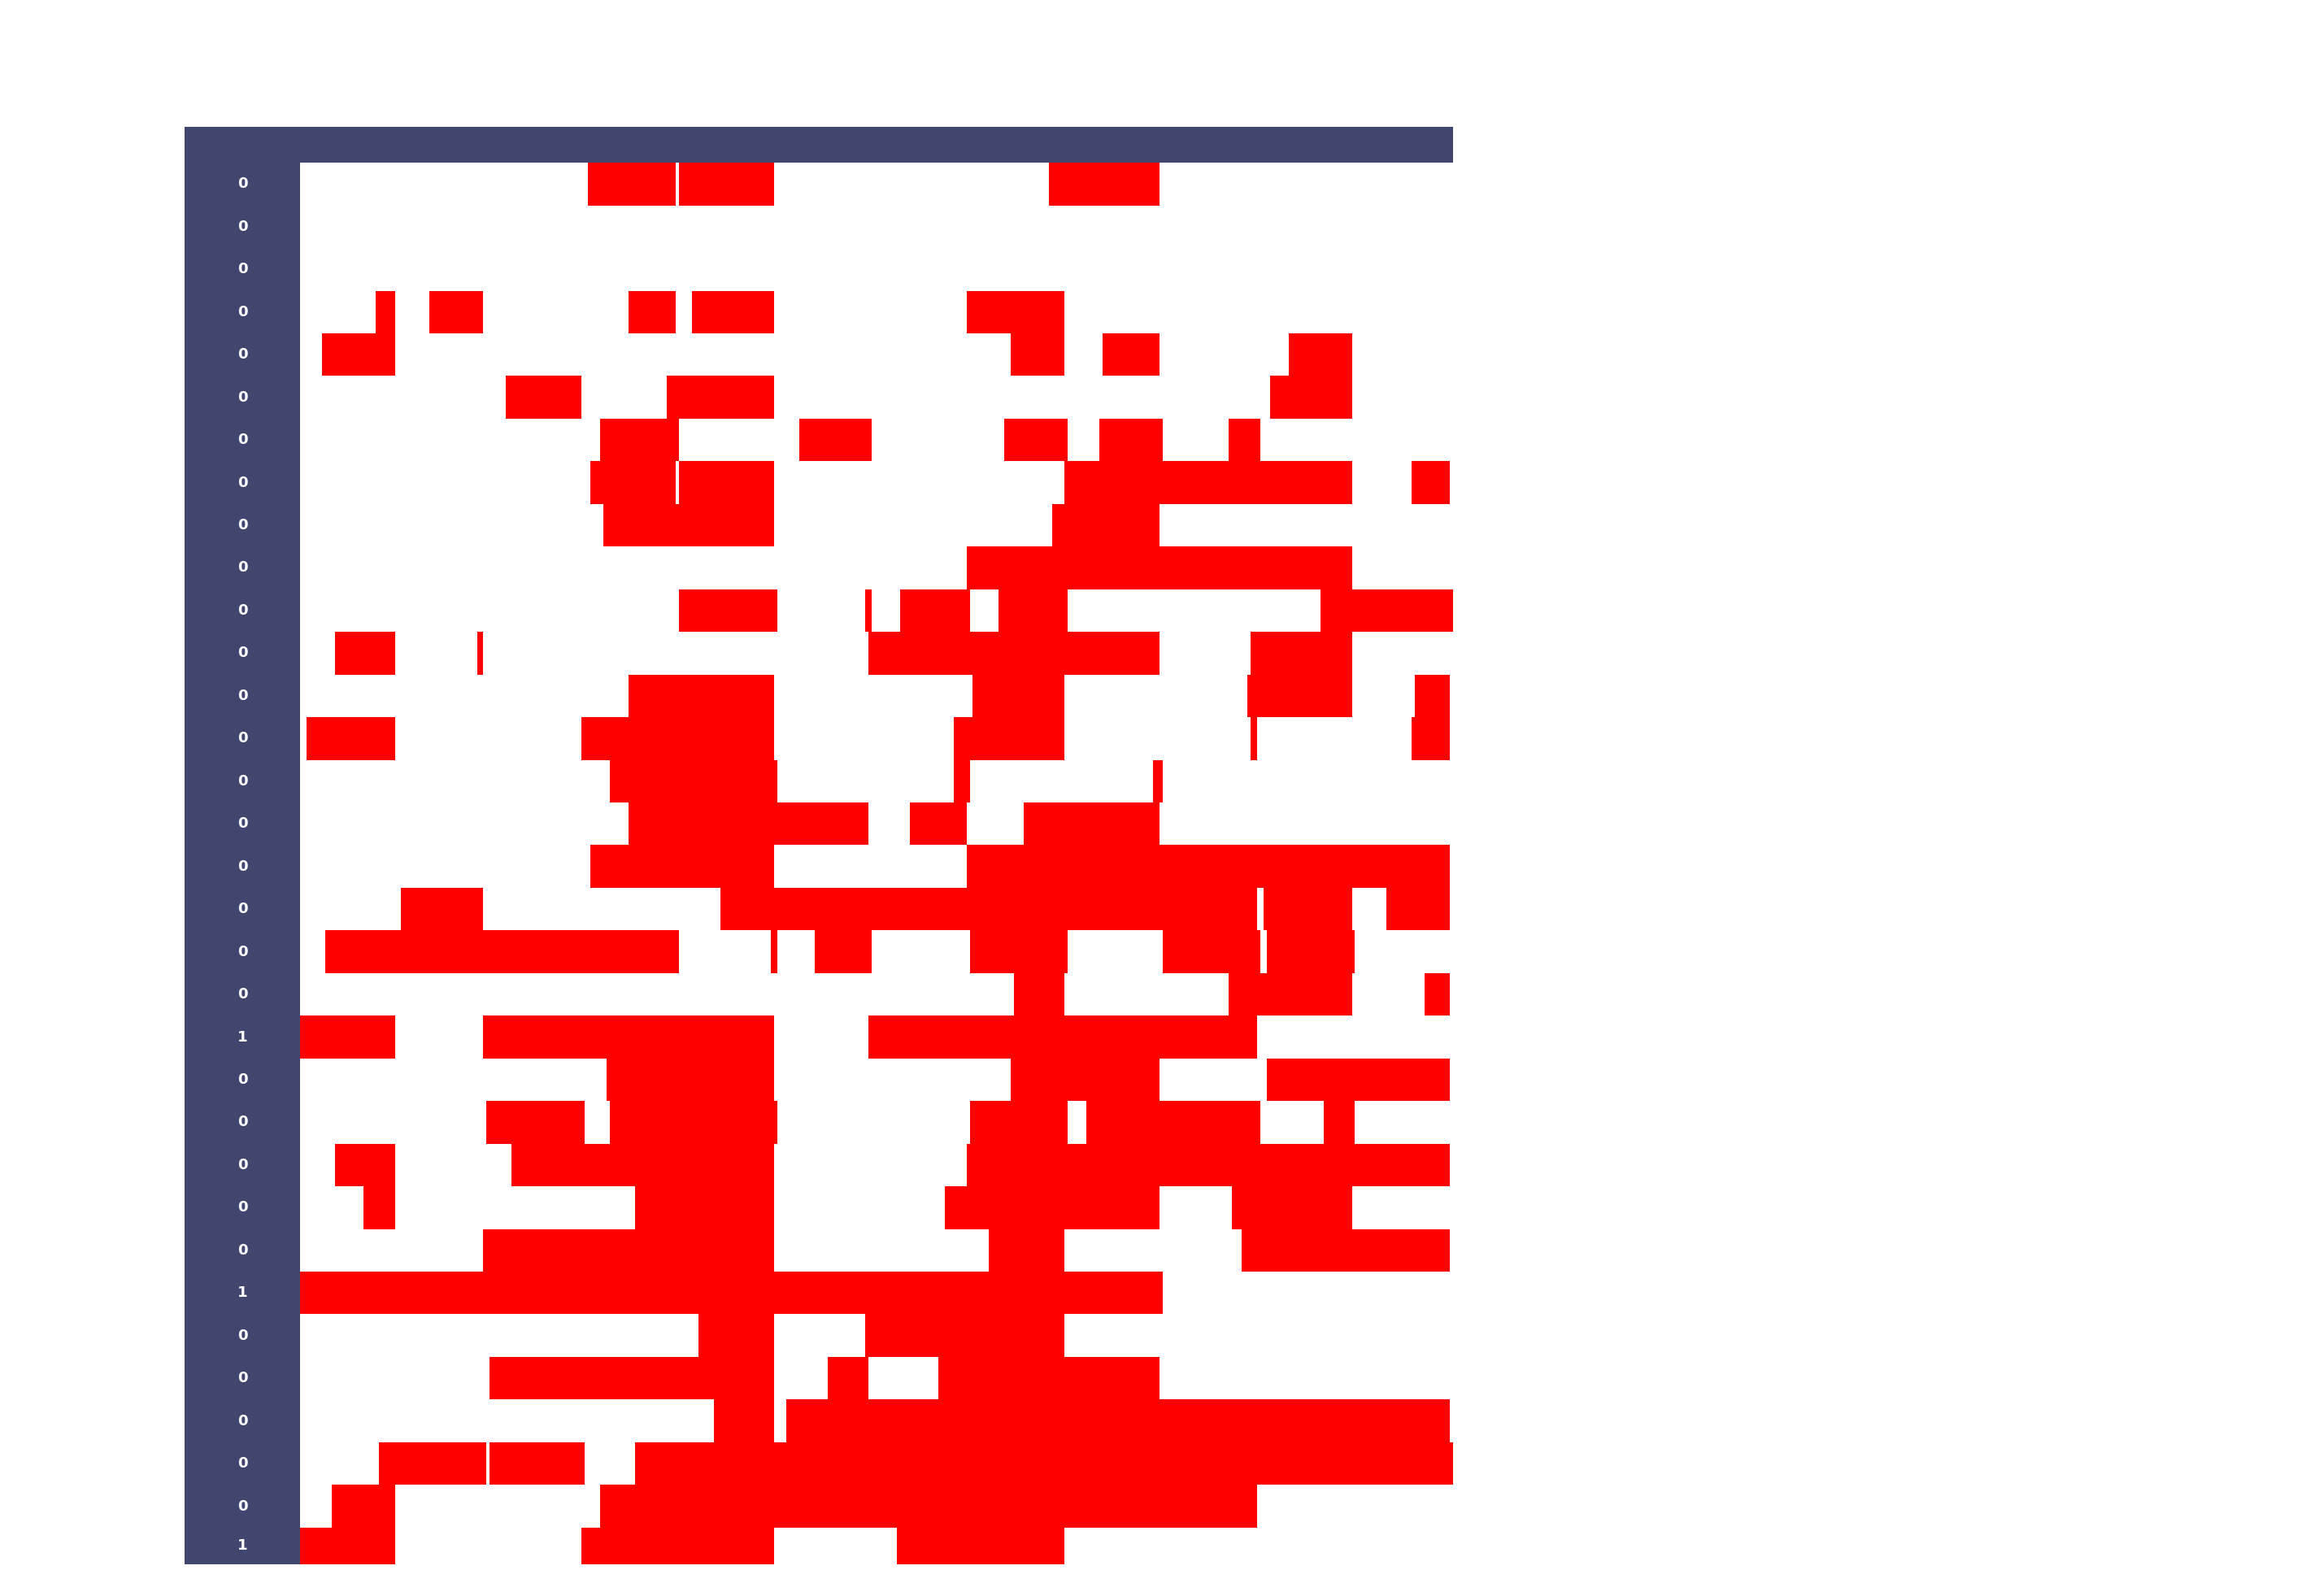

In [61]:
%matplotlib notebook

### Define the picture size and remove the ticks
fig = plt.figure()
fig.set_size_inches(26,18)
table=fig.add_axes([0.08, 0.02, 0.55, 0.9], frame_on=False) 
table.xaxis.set_ticks_position('none')
table.yaxis.set_ticks_position('none') 
table.set_xticklabels('')
table.set_yticklabels('')

render_mpl_table(db2, header_columns=1, col_width=0.002,ax=table)
plt.show()

In [ ]:
df4